<a href="https://colab.research.google.com/github/vackup/CovidArgentina/blob/master/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import generales

In [0]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from google.colab import drive

In [69]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Global settings and functions

In [0]:
today = date.today()
days_name_weekends = ['Saturday','Sunday']

# to automate reports download, take a look at https://github.com/ActiveConclusion/COVID19_mobility/blob/master/jupyter_notebooks/Scraper%202.0.ipynb

apple_dataset_date = '2020-05-02'

#google_dataset_date = '2020-05-01'
#path_google_dataset = '/content/drive/My Drive/Colab Notebooks/Global_Mobility_Report-' + google_dataset_date + '.csv'
path_google_dataset = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'

In [0]:
def get_df_without_weekends_and_holidays(df):
    df_without_weekends_and_holidays = df[~df.index.isin(df_feriados.index)]
    df_without_weekends_and_holidays = df_without_weekends_and_holidays[~df_without_weekends_and_holidays['Weekday Name'].isin(days_name_weekends)]

    return df_without_weekends_and_holidays

def get_df_only_weekends_and_holidays(df):
    df_only_holidays = df[df.index.isin(df_feriados.index)]
    df_only_weekends = df[df['Weekday Name'].isin(days_name_weekends)]

    df_contat = pd.concat([df_only_weekends, df_only_holidays])

    df_contat = df_contat.sort_index()

    return df_contat

def get_df_only_weekends(df):
    df_only_weekends = df[df['Weekday Name'].isin(days_name_weekends)]

    return df_only_weekends

# Dataset evolucion diaria infectados, muertos y recuperados

In [0]:
df = pd.read_json('https://pomber.github.io/covid19/timeseries.json')

In [0]:
df2 = pd.DataFrame(df['Argentina'].values.tolist())


In [0]:
df2['date'] = pd.to_datetime(df2['date'])
df2 = df2.set_index('date')
df2 = df2.loc['2020-03-01' : today]

In [75]:
df2.shape


(64, 3)

In [76]:
df2.head(3)

,confirmed,deaths,recovered
date,,,
2020-03-01,0,0,0
2020-03-02,0,0,0
2020-03-03,1,0,0


In [77]:
df2.tail(3)

,confirmed,deaths,recovered
date,,,
2020-05-01,4532,225,1292
2020-05-02,4681,237,1320
2020-05-03,4783,246,1354


In [78]:
df2.dtypes

confirmed    int64
deaths       int64
recovered    int64
dtype: object

In [79]:
df2.index

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
               '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
               '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
               '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
               '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
               '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
               '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
      

In [0]:
df2['Weekday Name'] = df2.index.day_name()

In [81]:
# Display a random sampling of 5 rows
df2.sample(5, random_state=0)

,confirmed,deaths,recovered,Weekday Name
date,,,,
2020-04-15,2443,111,596,Wednesday
2020-03-30,820,23,228,Monday
2020-04-13,2208,97,515,Monday
2020-05-01,4532,225,1292,Friday
2020-04-04,1451,43,279,Saturday


In [0]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(25, 15)})

In [0]:
#cols_plot = ['confirmed', 'deaths', 'recovered']

#axes = df2[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
#for ax in axes:
#    ax.set_ylabel('Daily Totals')

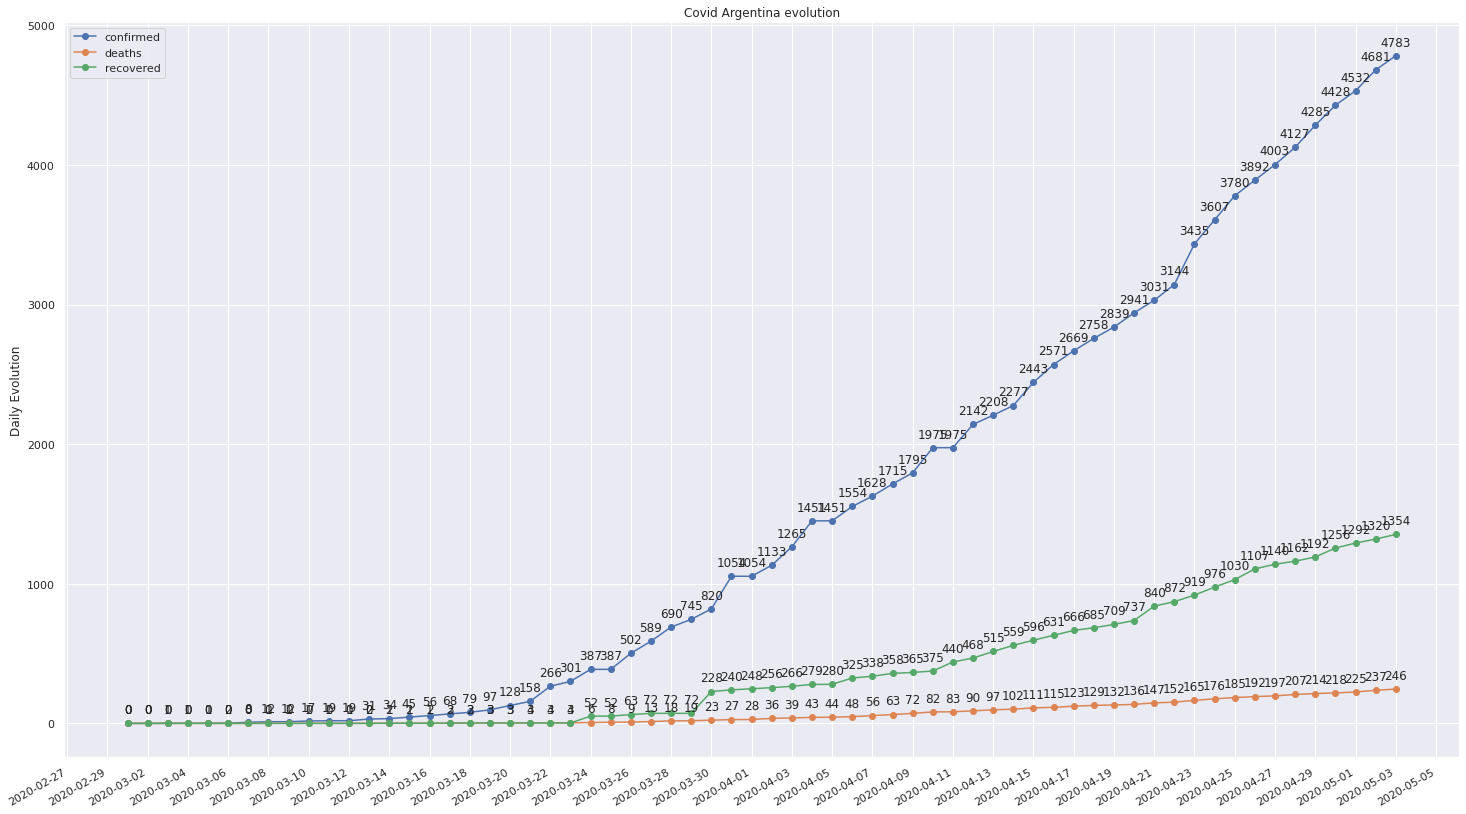

In [84]:
cols_plot = ['confirmed', 'deaths', 'recovered']

fig, ax = plt.subplots()

ax.plot(df2['confirmed'], marker='o', linestyle='-', label='confirmed')
ax.plot(df2['deaths'], marker='o', linestyle='-', label='deaths')
ax.plot(df2['recovered'], marker='o', linestyle='-', label='recovered')
#ax.plot(df2[cols_plot], marker='o', linestyle='-')

ax.set_ylabel('Daily Evolution')
ax.set_title('Covid Argentina evolution')

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'));

plt.legend(loc="upper left")
#plt.legend(cols_plot)

fig.autofmt_xdate()

for X, Y in zip(df2.index, df2['confirmed']):
    label = "{:.0f}".format(Y)

    ax.annotate(label, # this is the text
                 (X,Y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

for X, Y in zip(df2.index, df2['deaths']):
    label = "{:.0f}".format(Y)

    ax.annotate(label, # this is the text
                 (X,Y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

for X, Y in zip(df2.index, df2['recovered']):
    label = "{:.0f}".format(Y)

    ax.annotate(label, # this is the text
                 (X,Y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

# Dataset feriados

In [0]:
path_feriados = '/content/drive/My Drive/Colab Notebooks/feriados2020.csv'
df_feriados = pd.read_csv(path_feriados)

In [86]:
df_feriados.head()

,Fecha
0,2020-1-1
1,2020-2-24
2,2020-2-25
3,2020-3-23
4,2020-3-24


In [0]:
df_feriados.Fecha = pd.to_datetime(df_feriados.Fecha)

In [88]:
df_feriados.dtypes

Fecha    datetime64[ns]
dtype: object

In [0]:
df_feriados = df_feriados.set_index('Fecha')

In [90]:
df_feriados.index

DatetimeIndex(['2020-01-01', '2020-02-24', '2020-02-25', '2020-03-23',
               '2020-03-24', '2020-03-31', '2020-04-09', '2020-04-10',
               '2020-05-01', '2020-05-25', '2020-06-15', '2020-06-20',
               '2020-07-09', '2020-07-10', '2020-08-17', '2020-10-12',
               '2020-11-23', '2020-12-07', '2020-12-08', '2020-12-24',
               '2020-12-25', '2020-12-31'],
              dtype='datetime64[ns]', name='Fecha', freq=None)

# Dataset Apple mobility

In [0]:
path_apple_dataset = '/content/drive/My Drive/Colab Notebooks/applemobilitytrends-' + apple_dataset_date + '.csv'
df_apple = pd.read_csv(path_apple_dataset)

In [92]:
df_apple.head(5)

,geo_type,region,transportation_type,alternative_name,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,...,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02
0,country/region,Albania,driving,NaN,100.0,95.30,101.43,97.20,103.55,112.67,104.83,94.39,94.07,93.51,92.94,102.13,102.38,101.41,94.62,89.12,90.17,90.21,97.71,102.50,108.92,92.82,91.48,93.99,96.72,102.46,103.29,107.83,87.99,94.18,94.62,99.70,139.30,123.90,129.41,102.24,...,21.61,21.98,23.07,23.94,19.49,21.78,23.66,25.11,25.02,25.20,24.11,20.54,22.54,26.40,26.03,26.43,26.70,26.32,25.47,24.89,32.64,31.43,30.67,30.00,29.26,22.94,24.55,31.51,33.59,31.69,33.94,30.22,25.22,30.39,37.39,36.69,35.90,38.09,37.23,29.36
1,country/region,Albania,walking,NaN,100.0,100.68,98.93,98.46,100.85,100.13,82.13,95.65,97.78,95.39,94.24,93.73,97.06,77.27,83.37,82.73,84.39,88.19,90.79,88.70,79.32,87.12,88.06,99.40,85.84,94.63,99.74,81.41,90.19,90.45,94.16,95.69,109.21,108.40,84.52,96.63,...,25.88,25.42,23.03,28.27,24.69,20.26,22.90,25.93,23.50,26.65,27.76,24.90,23.92,31.13,25.80,29.81,28.96,27.29,27.63,29.59,35.52,38.08,35.48,39.15,34.58,27.76,27.93,36.72,34.46,35.39,34.80,34.63,29.00,35.22,41.83,37.53,41.49,38.25,38.68,32.28
2,country/region,Argentina,driving,NaN,100.0,97.07,102.45,111.21,118.45,124.01,95.44,95.13,95.42,97.66,99.42,113.34,118.23,91.31,93.37,91.12,92.35,96.74,111.24,123.96,89.01,91.66,89.18,94.49,95.98,111.12,121.53,89.23,96.42,96.97,101.68,104.90,122.91,127.62,88.20,92.28,...,10.76,14.86,14.58,15.45,13.34,9.92,14.59,12.65,15.79,16.48,17.15,15.13,11.53,17.24,18.55,19.95,19.80,16.80,19.40,12.89,21.10,22.29,23.55,24.40,27.17,23.19,14.54,26.67,27.25,27.61,28.73,30.99,25.92,16.57,27.45,27.12,32.22,34.45,22.69,28.23
3,country/region,Argentina,walking,NaN,100.0,95.11,101.37,112.67,116.72,114.14,84.54,101.37,106.12,104.91,102.56,104.88,98.83,73.64,94.27,93.86,92.20,96.00,98.99,97.42,67.21,95.18,96.25,100.39,99.10,105.00,106.45,73.12,104.20,105.87,111.47,113.20,128.75,103.47,69.12,93.42,...,8.05,10.92,10.53,11.30,10.73,7.77,11.37,9.79,11.78,11.23,12.44,10.97,9.12,11.85,13.49,15.51,14.65,13.58,15.75,10.45,16.35,16.66,17.42,18.18,18.80,17.03,10.59,18.44,19.01,18.47,20.39,22.32,23.31,16.36,18.48,17.49,22.78,24.80,16.62,20.61
4,country/region,Australia,driving,NaN,100.0,102.98,104.21,108.63,109.08,89.00,99.35,103.53,106.80,107.40,115.65,109.66,88.59,85.18,95.91,99.40,99.92,103.04,103.73,85.73,93.39,95.83,98.63,102.40,107.46,106.55,86.33,98.78,100.08,103.28,106.19,116.62,115.36,93.51,98.27,101.79,...,60.19,57.96,59.90,48.25,36.69,51.18,51.92,52.04,51.54,54.23,41.58,33.34,51.75,53.17,55.01,59.24,33.19,36.00,26.95,31.72,53.14,55.91,56.56,58.77,47.51,36.90,53.34,56.93,58.06,59.69,62.87,47.84,41.89,55.39,59.09,59.46,59.46,63.12,58.40,48.67


In [0]:
df_apple_argentina = df_apple[df_apple.region.eq("Argentina")]

In [94]:
df_apple_argentina.head()

,geo_type,region,transportation_type,alternative_name,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,...,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02
2,country/region,Argentina,driving,NaN,100.0,97.07,102.45,111.21,118.45,124.01,95.44,95.13,95.42,97.66,99.42,113.34,118.23,91.31,93.37,91.12,92.35,96.74,111.24,123.96,89.01,91.66,89.18,94.49,95.98,111.12,121.53,89.23,96.42,96.97,101.68,104.9,122.91,127.62,88.20,92.28,...,10.76,14.86,14.58,15.45,13.34,9.92,14.59,12.65,15.79,16.48,17.15,15.13,11.53,17.24,18.55,19.95,19.80,16.80,19.40,12.89,21.10,22.29,23.55,24.40,27.17,23.19,14.54,26.67,27.25,27.61,28.73,30.99,25.92,16.57,27.45,27.12,32.22,34.45,22.69,28.23
3,country/region,Argentina,walking,NaN,100.0,95.11,101.37,112.67,116.72,114.14,84.54,101.37,106.12,104.91,102.56,104.88,98.83,73.64,94.27,93.86,92.20,96.00,98.99,97.42,67.21,95.18,96.25,100.39,99.10,105.00,106.45,73.12,104.20,105.87,111.47,113.2,128.75,103.47,69.12,93.42,...,8.05,10.92,10.53,11.30,10.73,7.77,11.37,9.79,11.78,11.23,12.44,10.97,9.12,11.85,13.49,15.51,14.65,13.58,15.75,10.45,16.35,16.66,17.42,18.18,18.80,17.03,10.59,18.44,19.01,18.47,20.39,22.32,23.31,16.36,18.48,17.49,22.78,24.80,16.62,20.61


In [95]:
df_apple_argentina.drop(columns=['geo_type', 'region', 'alternative_name'], inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [96]:
df_apple_argentina.head()

,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,...,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02
2,driving,100.0,97.07,102.45,111.21,118.45,124.01,95.44,95.13,95.42,97.66,99.42,113.34,118.23,91.31,93.37,91.12,92.35,96.74,111.24,123.96,89.01,91.66,89.18,94.49,95.98,111.12,121.53,89.23,96.42,96.97,101.68,104.9,122.91,127.62,88.20,92.28,98.15,98.96,104.71,...,10.76,14.86,14.58,15.45,13.34,9.92,14.59,12.65,15.79,16.48,17.15,15.13,11.53,17.24,18.55,19.95,19.80,16.80,19.40,12.89,21.10,22.29,23.55,24.40,27.17,23.19,14.54,26.67,27.25,27.61,28.73,30.99,25.92,16.57,27.45,27.12,32.22,34.45,22.69,28.23
3,walking,100.0,95.11,101.37,112.67,116.72,114.14,84.54,101.37,106.12,104.91,102.56,104.88,98.83,73.64,94.27,93.86,92.20,96.00,98.99,97.42,67.21,95.18,96.25,100.39,99.10,105.00,106.45,73.12,104.20,105.87,111.47,113.2,128.75,103.47,69.12,93.42,111.49,107.02,111.36,...,8.05,10.92,10.53,11.30,10.73,7.77,11.37,9.79,11.78,11.23,12.44,10.97,9.12,11.85,13.49,15.51,14.65,13.58,15.75,10.45,16.35,16.66,17.42,18.18,18.80,17.03,10.59,18.44,19.01,18.47,20.39,22.32,23.31,16.36,18.48,17.49,22.78,24.80,16.62,20.61


In [0]:
df_apple_argentina = df_apple_argentina.set_index('transportation_type')

In [0]:
df_apple_argentina_t = df_apple_argentina.transpose()

In [99]:
df_apple_argentina_t

transportation_type,driving,walking
2020-01-13,100.00,100.00
2020-01-14,97.07,95.11
2020-01-15,102.45,101.37
2020-01-16,111.21,112.67
2020-01-17,118.45,116.72
...,...,...
2020-04-28,27.12,17.49
2020-04-29,32.22,22.78
2020-04-30,34.45,24.80
2020-05-01,22.69,16.62


In [0]:
# Converting the index as date
df_apple_argentina_t.index = pd.to_datetime(df_apple_argentina_t.index)

In [101]:
type(df_apple_argentina_t.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [102]:
df_apple_argentina_t.head()

transportation_type,driving,walking
2020-01-13,100.00,100.00
2020-01-14,97.07,95.11
2020-01-15,102.45,101.37
2020-01-16,111.21,112.67
2020-01-17,118.45,116.72


In [0]:
df_apple_argentina_t.index.rename('date', inplace=True)

In [104]:
df_apple_argentina_t.head()

transportation_type,driving,walking
date,,
2020-01-13,100.00,100.00
2020-01-14,97.07,95.11
2020-01-15,102.45,101.37
2020-01-16,111.21,112.67
2020-01-17,118.45,116.72


In [0]:
df_apple_argentina_t = df_apple_argentina_t.loc['2020-03-01' : today]

In [106]:
df_apple_argentina_t.head(10)

transportation_type,driving,walking
date,,
2020-03-01,81.13,68.50
2020-03-02,86.76,101.01
2020-03-03,88.90,104.39
2020-03-04,92.74,108.23
2020-03-05,97.45,113.92
2020-03-06,118.32,126.70
2020-03-07,122.78,112.81
2020-03-08,80.36,70.94
2020-03-09,89.28,109.38


In [107]:
df_apple_argentina_t['driving-100'] = df_apple_argentina_t['driving'] - 100
df_apple_argentina_t['walking-100'] = df_apple_argentina_t['walking'] - 100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [108]:
df_apple_argentina_t.head()

transportation_type,driving,walking,driving-100,walking-100
date,,,,
2020-03-01,81.13,68.50,-18.87,-31.50
2020-03-02,86.76,101.01,-13.24,1.01
2020-03-03,88.90,104.39,-11.10,4.39
2020-03-04,92.74,108.23,-7.26,8.23
2020-03-05,97.45,113.92,-2.55,13.92


In [0]:
df_apple_argentina_t = df_apple_argentina_t[~df_apple_argentina_t.index.isin(df_feriados.index)]

In [0]:
df_apple_argentina_t['Weekday Name'] = df_apple_argentina_t.index.day_name()

In [111]:
df_apple_argentina_t.head(10)

transportation_type,driving,walking,driving-100,walking-100,Weekday Name
date,,,,,
2020-03-01,81.13,68.50,-18.87,-31.50,Sunday
2020-03-02,86.76,101.01,-13.24,1.01,Monday
2020-03-03,88.90,104.39,-11.10,4.39,Tuesday
2020-03-04,92.74,108.23,-7.26,8.23,Wednesday
2020-03-05,97.45,113.92,-2.55,13.92,Thursday
2020-03-06,118.32,126.70,18.32,26.70,Friday
2020-03-07,122.78,112.81,22.78,12.81,Saturday
2020-03-08,80.36,70.94,-19.64,-29.06,Sunday
2020-03-09,89.28,109.38,-10.72,9.38,Monday


In [0]:
df_apple_without_weekends_and_holidays = get_df_without_weekends_and_holidays(df_apple_argentina_t)

In [113]:
df_apple_without_weekends_and_holidays.head(10)

transportation_type,driving,walking,driving-100,walking-100,Weekday Name
date,,,,,
2020-03-02,86.76,101.01,-13.24,1.01,Monday
2020-03-03,88.90,104.39,-11.10,4.39,Tuesday
2020-03-04,92.74,108.23,-7.26,8.23,Wednesday
2020-03-05,97.45,113.92,-2.55,13.92,Thursday
2020-03-06,118.32,126.70,18.32,26.70,Friday
2020-03-09,89.28,109.38,-10.72,9.38,Monday
2020-03-10,89.29,109.62,-10.71,9.62,Tuesday
2020-03-11,82.73,83.06,-17.27,-16.94,Wednesday
2020-03-12,86.67,106.85,-13.33,6.85,Thursday


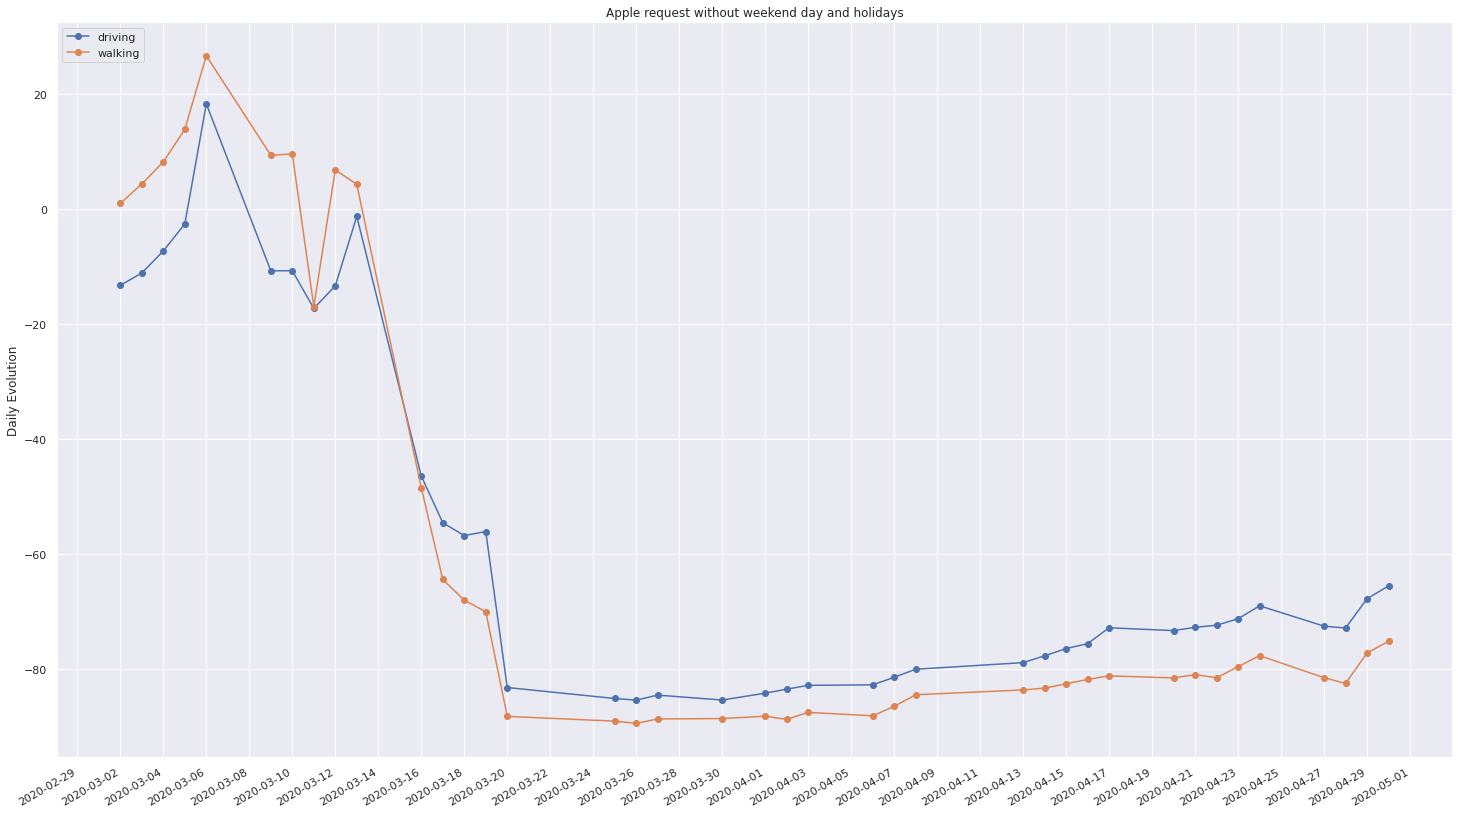

In [114]:
fig, ax = plt.subplots()

ax.plot(df_apple_without_weekends_and_holidays['driving-100'], marker='o', linestyle='-', label='driving')
ax.plot(df_apple_without_weekends_and_holidays['walking-100'], marker='o', linestyle='-', label='walking')

ax.set_ylabel('Daily Evolution')
ax.set_title('Apple request without weekend day and holidays')

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'));

plt.legend(loc="upper left")

fig.autofmt_xdate()

# Dataset Google Mobility

In [135]:
df_google = pd.read_csv(path_google_dataset)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [136]:
df_google.head(10)

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
5,AE,United Arab Emirates,NaN,NaN,2020-02-20,-2.0,1.0,6.0,1.0,1.0,1.0
6,AE,United Arab Emirates,NaN,NaN,2020-02-21,-3.0,2.0,6.0,0.0,-1.0,1.0
7,AE,United Arab Emirates,NaN,NaN,2020-02-22,-2.0,2.0,4.0,-2.0,3.0,1.0
8,AE,United Arab Emirates,NaN,NaN,2020-02-23,-1.0,3.0,3.0,-1.0,4.0,1.0
9,AE,United Arab Emirates,NaN,NaN,2020-02-24,-3.0,0.0,5.0,-1.0,3.0,1.0


In [0]:
df_google = df_google[df_google.country_region.eq('Argentina')]

In [118]:
df_google

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
792,AR,Argentina,NaN,NaN,2020-02-15,1.0,-3.0,-3.0,4.0,-1.0,0.0
793,AR,Argentina,NaN,NaN,2020-02-16,-6.0,-6.0,-14.0,-2.0,-4.0,2.0
794,AR,Argentina,NaN,NaN,2020-02-17,-10.0,-8.0,-23.0,-2.0,7.0,1.0
795,AR,Argentina,NaN,NaN,2020-02-18,3.0,3.0,-2.0,9.0,9.0,-1.0
796,AR,Argentina,NaN,NaN,2020-02-19,1.0,0.0,10.0,8.0,11.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...
2587,AR,Argentina,Tucumán,NaN,2020-04-22,-79.0,-25.0,-84.0,-68.0,-40.0,18.0
2588,AR,Argentina,Tucumán,NaN,2020-04-23,-80.0,-30.0,-85.0,-70.0,-40.0,20.0
2589,AR,Argentina,Tucumán,NaN,2020-04-24,-80.0,-27.0,-85.0,-73.0,-38.0,21.0
2590,AR,Argentina,Tucumán,NaN,2020-04-25,-81.0,-28.0,-87.0,-77.0,-31.0,21.0


In [0]:
df_google = df_google[~df_google.sub_region_1.notnull()]

In [120]:
df_google

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
792,AR,Argentina,NaN,NaN,2020-02-15,1.0,-3.0,-3.0,4.0,-1.0,0.0
793,AR,Argentina,NaN,NaN,2020-02-16,-6.0,-6.0,-14.0,-2.0,-4.0,2.0
794,AR,Argentina,NaN,NaN,2020-02-17,-10.0,-8.0,-23.0,-2.0,7.0,1.0
795,AR,Argentina,NaN,NaN,2020-02-18,3.0,3.0,-2.0,9.0,9.0,-1.0
796,AR,Argentina,NaN,NaN,2020-02-19,1.0,0.0,10.0,8.0,11.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...
859,AR,Argentina,NaN,NaN,2020-04-22,-83.0,-34.0,-91.0,-61.0,-49.0,23.0
860,AR,Argentina,NaN,NaN,2020-04-23,-83.0,-35.0,-92.0,-62.0,-49.0,24.0
861,AR,Argentina,NaN,NaN,2020-04-24,-83.0,-34.0,-92.0,-63.0,-48.0,27.0
862,AR,Argentina,NaN,NaN,2020-04-25,-86.0,-39.0,-94.0,-68.0,-44.0,26.0


In [121]:
df_google.drop(columns=['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2'], inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [122]:
df_google.head()

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
792,2020-02-15,1.0,-3.0,-3.0,4.0,-1.0,0.0
793,2020-02-16,-6.0,-6.0,-14.0,-2.0,-4.0,2.0
794,2020-02-17,-10.0,-8.0,-23.0,-2.0,7.0,1.0
795,2020-02-18,3.0,3.0,-2.0,9.0,9.0,-1.0
796,2020-02-19,1.0,0.0,10.0,8.0,11.0,-2.0


In [123]:
df_google.dtypes

date                                                   object
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
dtype: object

In [124]:
df_google.date = pd.to_datetime(df_google.date)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [125]:
df_google.dtypes

date                                                  datetime64[ns]
retail_and_recreation_percent_change_from_baseline           float64
grocery_and_pharmacy_percent_change_from_baseline            float64
parks_percent_change_from_baseline                           float64
transit_stations_percent_change_from_baseline                float64
workplaces_percent_change_from_baseline                      float64
residential_percent_change_from_baseline                     float64
dtype: object

In [0]:
df_google = df_google.set_index('date')

In [127]:
df_google.index

DatetimeIndex(['2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
               '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
               '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
      

In [128]:
df_google = df_google.loc['2020-03-01' : today]
df_google.head(10)

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,
2020-03-01,-3.0,3.0,-11.0,1.0,-2.0,2.0
2020-03-02,1.0,4.0,-8.0,7.0,16.0,-1.0
2020-03-03,0.0,5.0,-6.0,8.0,16.0,-1.0
2020-03-04,-1.0,3.0,-1.0,8.0,18.0,-2.0
2020-03-05,1.0,4.0,-9.0,10.0,18.0,-1.0
2020-03-06,6.0,8.0,-7.0,12.0,18.0,-2.0
2020-03-07,5.0,7.0,-10.0,8.0,3.0,1.0
2020-03-08,3.0,4.0,-12.0,3.0,-2.0,2.0
2020-03-09,1.0,5.0,-9.0,13.0,15.0,-1.0


In [0]:
df_google['Weekday Name'] = df_google.index.day_name()

In [0]:
df_google_without_weekends_and_holidays = get_df_without_weekends_and_holidays(df_google)

In [131]:
df_google_without_weekends_and_holidays.head(100)

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Weekday Name
date,,,,,,,
2020-03-02,1.0,4.0,-8.0,7.0,16.0,-1.0,Monday
2020-03-03,0.0,5.0,-6.0,8.0,16.0,-1.0,Tuesday
2020-03-04,-1.0,3.0,-1.0,8.0,18.0,-2.0,Wednesday
2020-03-05,1.0,4.0,-9.0,10.0,18.0,-1.0,Thursday
2020-03-06,6.0,8.0,-7.0,12.0,18.0,-2.0,Friday
2020-03-09,1.0,5.0,-9.0,13.0,15.0,-1.0,Monday
2020-03-10,3.0,8.0,-9.0,14.0,18.0,-2.0,Tuesday
2020-03-11,-16.0,-7.0,-24.0,-6.0,15.0,0.0,Wednesday
2020-03-12,-4.0,8.0,-16.0,10.0,18.0,-1.0,Thursday


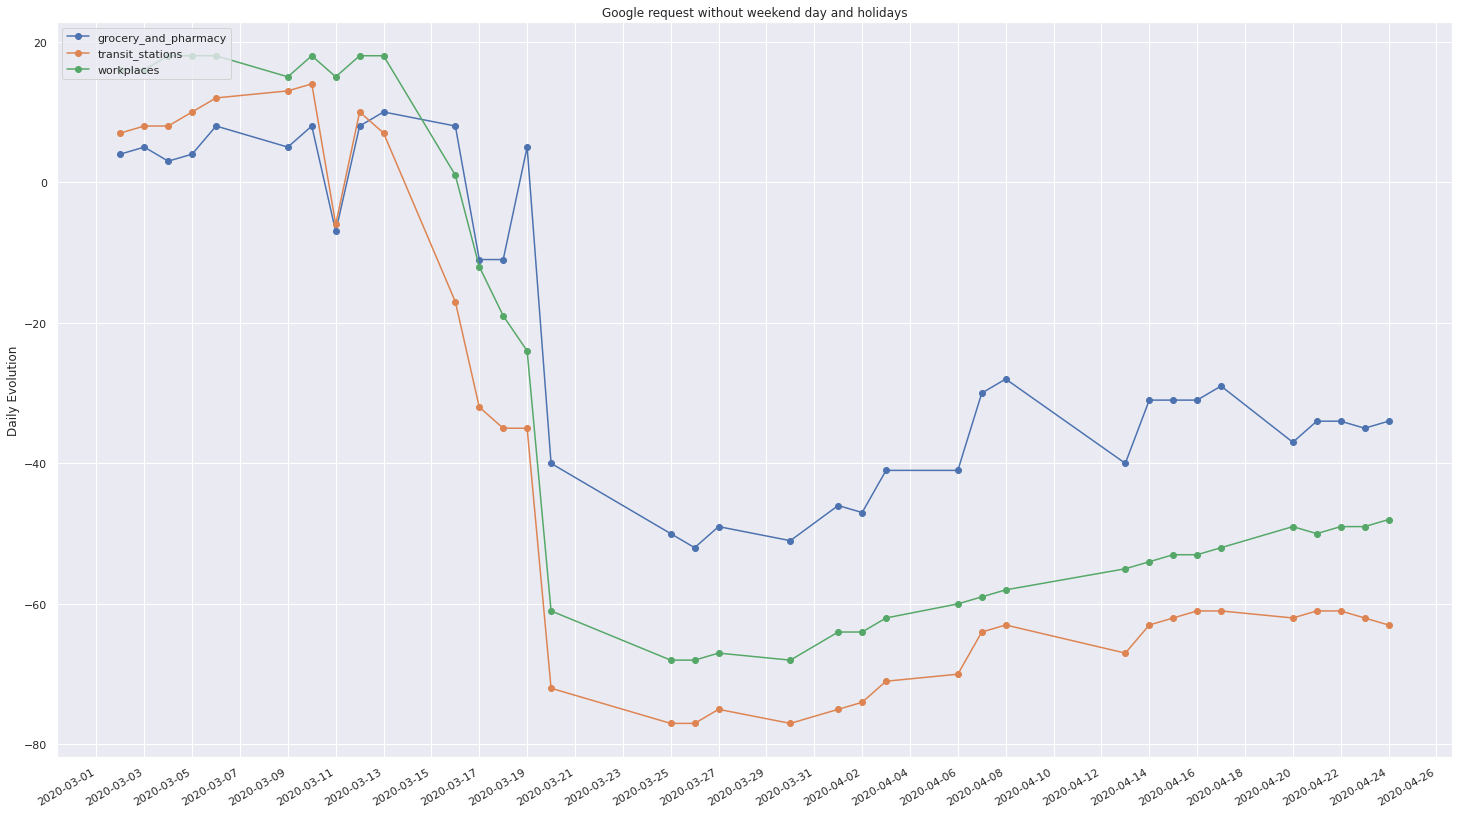

In [132]:
fig, ax = plt.subplots()

ax.plot(df_google_without_weekends_and_holidays['grocery_and_pharmacy_percent_change_from_baseline'], marker='o', linestyle='-', label='grocery_and_pharmacy')
ax.plot(df_google_without_weekends_and_holidays['transit_stations_percent_change_from_baseline'], marker='o', linestyle='-', label='transit_stations')
ax.plot(df_google_without_weekends_and_holidays['workplaces_percent_change_from_baseline'], marker='o', linestyle='-', label='workplaces')

ax.set_ylabel('Daily Evolution')
ax.set_title('Google request without weekend day and holidays')

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'));

plt.legend(loc="upper left")

fig.autofmt_xdate()

In [0]:
df_only_weekends = get_df_only_weekends(df_google)

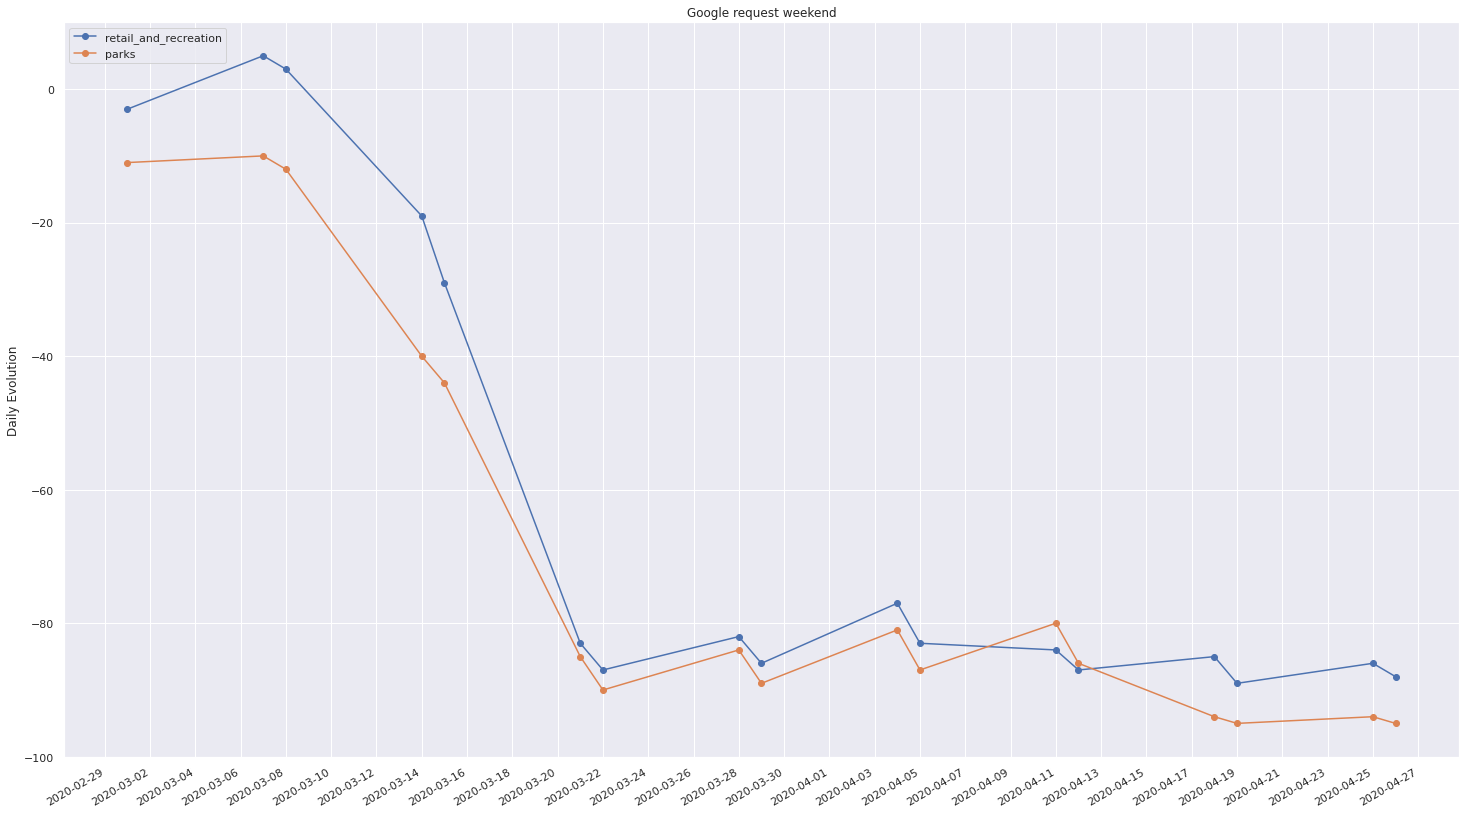

In [134]:
fig, ax = plt.subplots()

ax.plot(df_only_weekends['retail_and_recreation_percent_change_from_baseline'], marker='o', linestyle='-', label='retail_and_recreation')
ax.plot(df_only_weekends['parks_percent_change_from_baseline'], marker='o', linestyle='-', label='parks')
#ax.plot(df_google_only_weekends_and_holidays['residential_percent_change_from_baseline'], marker='o', linestyle='-', label='residential')

ax.set_ylabel('Daily Evolution')
ax.set_title('Google request weekend')

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'));

plt.legend(loc="upper left")

fig.autofmt_xdate()